In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
# data will come from a known distribution
# so we can check our answer

def generate_batch(batch_size = 32):
    # x in (-5, +5)
    x = np.random.random(batch_size) * 10 - 5
    
    # sd is a function of x
    sd = 0.05 + 0.1 * (x + 5)
    
    # target = mean + noise * sd
    y = np.cos(x) - 0.3 * x + np.random.randn(batch_size) * sd
    
    return x, y

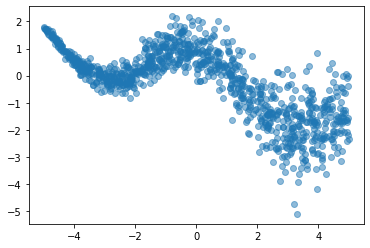

In [5]:
# visualize the data
x, y = generate_batch(1024)
plt.scatter(x, y, alpha = 0.5);

In [7]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.ann1 = nn.Sequential(
            nn.Linear(1,10),
            nn.Tanh(),
            nn.Linear(10,1)
        )
        self.ann2 = nn.Sequential(
            nn.Linear(1,10),
            nn.Tanh(),
            nn.Linear(10,1)
        )
        
    def forward(self, inputs):
        # returns (mean, log-variance)
        return self.ann1(inputs), self.ann2(inpouts)

In [8]:
model = Model()

In [9]:
def criterion(outputs, targets):
    mu = outputs[0]
    v = torch.exp(outputs[1])
    
    # coefficient term
    c = torch.log(torch.sqrt(2*np.pi*v))
    
    # exponent term
    f = 0.5 / v * (targets - mu)**2
    
    # mean log-likelihood
    nll = torch.mean(c + f)
    
    return nll

In [10]:
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
n_epochs = 5000
batch_size = 128